In [1]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss, confusion_matrix
import matplotlib.pyplot as plt
import zipfile 



np.random.seed(100)
LEVEL = 'level_1'

In [14]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")
    
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred 
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)
    
    if display_loss:
      print(loss[epochs-1])
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce":
        plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [15]:
def read_all(folder_path, key_prefix=""):
    '''
    It returns a dictionary with 'file names' as keys and 'flattened image arrays' as values.
    '''
    print("Reading:")
    images = {}
    files = os.listdir(folder_path)
    print(files)
    
    for i, file_name in tqdm_notebook(enumerate(files), total=len(files)):
        print(file_name)
        file_path = os.path.join(folder_path, file_name)
        image_index = key_prefix + file_name[:-4]
        if os.path.isdir(file_path):
            for j in os.listdir(file_path):
               # print(os.listdir(file_path))
               # file_path = os.path.join(file_path,image_index)#extra
               # print(image_index)
                fp=os.path.join(file_path,j)
                image = Image.open(fp)
        else:
            image=Image.open(file_path)
        image = image.convert("L")
        images[image_index] = np.array(image.copy()).flatten()
        image.close()
    return images

In [16]:
languages = ['ta', 'hi', 'en']
print(os.listdir("../input/level_1_train/level_1"))
images_train = read_all("../input/level_1_train/level_1", key_prefix='bgr_') # change the path

for language in languages:
  images_train.update(read_all("../input/"+LEVEL+"_train/level_1/"+language, key_prefix=language+"_" ))
print(len(images_train))

images_test = read_all("../input/level_1_test/kaggle_level_1", key_prefix='') # change the path
print(len(images_test))

['en', 'ta', 'hi', 'background']
Reading:
['en', 'ta', 'hi', 'background']


en
ta
hi
background

Reading:
['c46_14.jpg', 'c57_76.jpg', 'c56_136.jpg', 'c55_103.jpg', 'c45_131.jpg', 'c65_61.jpg', 'c64_87.jpg', 'c47_94.jpg', 'c16_78.jpg', 'c16_88.jpg', 'c85_123.jpg', 'c23_97.jpg', 'c64_57.jpg', 'c49_145.jpg', 'c55_56.jpg', 'c59_34.jpg', 'c68_77.jpg', 'c10_6.jpg', 'c22_32.jpg', 'c55_81.jpg', 'c4_38.jpg', 'c71_132.jpg', 'c92_140.jpg', 'c61_53.jpg', 'c53_83.jpg', 'c31_98.jpg', 'c2_15.jpg', 'c55_99.jpg', 'c79_134.jpg', 'c28_129.jpg', 'c76_74.jpg', 'c62_116.jpg', 'c83_37.jpg', 'c63_16.jpg', 'c61_138.jpg', 'c27_10.jpg', 'c36_133.jpg', 'c13_59.jpg', 'c32_4.jpg', 'c36_65.jpg', 'c4_113.jpg', 'c74_106.jpg', 'c71_28.jpg', 'c11_128.jpg', 'c82_17.jpg', 'c0_144.jpg', 'c0_11.jpg', 'c21_39.jpg', 'c30_135.jpg', 'c25_69.jpg', 'c55_114.jpg', 'c22_62.jpg', 'c80_42.jpg', 'c40_109.jpg', 'c52_51.jpg', 'c42_105.jpg', 'c2_50.jpg', 'c26_55.jpg', 'c79_46.jpg', 'c86_67.jpg', 'c53_141.jpg', 'c13_30.jpg', 'c22_26.jpg', 'c66_148.jpg', 'c68_18.jpg', 'c94_79.jpg', 'c2_147.jpg', 'c8_121.jpg', 'c3

c46_14.jpg
c57_76.jpg
c56_136.jpg
c55_103.jpg
c45_131.jpg
c65_61.jpg
c64_87.jpg
c47_94.jpg
c16_78.jpg
c16_88.jpg
c85_123.jpg
c23_97.jpg
c64_57.jpg
c49_145.jpg
c55_56.jpg
c59_34.jpg
c68_77.jpg
c10_6.jpg
c22_32.jpg
c55_81.jpg
c4_38.jpg
c71_132.jpg
c92_140.jpg
c61_53.jpg
c53_83.jpg
c31_98.jpg
c2_15.jpg
c55_99.jpg
c79_134.jpg
c28_129.jpg
c76_74.jpg
c62_116.jpg
c83_37.jpg
c63_16.jpg
c61_138.jpg
c27_10.jpg
c36_133.jpg
c13_59.jpg
c32_4.jpg
c36_65.jpg
c4_113.jpg
c74_106.jpg
c71_28.jpg
c11_128.jpg
c82_17.jpg
c0_144.jpg
c0_11.jpg
c21_39.jpg
c30_135.jpg
c25_69.jpg
c55_114.jpg
c22_62.jpg
c80_42.jpg
c40_109.jpg
c52_51.jpg
c42_105.jpg
c2_50.jpg
c26_55.jpg
c79_46.jpg
c86_67.jpg
c53_141.jpg
c13_30.jpg
c22_26.jpg
c66_148.jpg
c68_18.jpg
c94_79.jpg
c2_147.jpg
c8_121.jpg
c39_92.jpg
c36_0.jpg
c71_31.jpg
c81_48.jpg
c93_44.jpg
c81_75.jpg
c22_13.jpg
c20_90.jpg
c78_117.jpg
c51_130.jpg
c70_45.jpg
c88_43.jpg
c30_52.jpg
c76_70.jpg
c33_100.jpg
c90_137.jpg
c26_66.jpg
c42_93.jpg
c41_71.jpg
c26_7.jpg
c34_8.jpg
c11_29

c0_132.jpg
c11_143.jpg
c3_14.jpg
c1_43.jpg
c2_76.jpg
c0_9.jpg
c10_137.jpg
c3_49.jpg
c11_25.jpg
c6_145.jpg
c3_38.jpg
c5_79.jpg
c11_118.jpg
c9_134.jpg
c8_77.jpg
c7_1.jpg
c2_52.jpg
c11_41.jpg
c8_97.jpg
c9_30.jpg
c5_131.jpg
c3_142.jpg
c8_46.jpg
c1_104.jpg
c2_138.jpg
c9_32.jpg
c3_35.jpg
c7_56.jpg
c7_4.jpg
c0_78.jpg
c3_68.jpg
c5_57.jpg
c4_109.jpg
c9_122.jpg
c1_18.jpg
c7_96.jpg
c10_48.jpg
c10_63.jpg
c6_126.jpg
c0_19.jpg
c4_95.jpg
c3_75.jpg
c2_149.jpg
c0_110.jpg
c6_130.jpg
c3_0.jpg
c8_129.jpg
c6_5.jpg
c8_106.jpg
c8_147.jpg
c9_108.jpg
c7_141.jpg
c11_84.jpg
c2_55.jpg
c11_42.jpg
c10_65.jpg
c7_13.jpg
c5_61.jpg
c11_105.jpg
c6_37.jpg
c3_6.jpg
c7_112.jpg
c0_16.jpg
c0_90.jpg
c0_11.jpg
c2_60.jpg
c4_121.jpg
c7_24.jpg
c0_99.jpg
c1_144.jpg
c8_59.jpg
c11_91.jpg
c5_88.jpg
c11_80.jpg
c9_86.jpg
c11_53.jpg
c6_114.jpg
c6_58.jpg
c6_133.jpg
c10_128.jpg
c10_64.jpg
c9_148.jpg
c7_50.jpg
c11_15.jpg
c10_101.jpg
c9_73.jpg
c3_3.jpg
c7_20.jpg
c8_116.jpg
c2_123.jpg
c6_45.jpg
c6_31.jpg
c5_74.jpg
c5_69.jpg
c4_82.jpg
c10_54.

c2_3.jpg
c37_43.jpg
c13_100.jpg
c51_19.jpg
c4_26.jpg
c43_18.jpg
c25_65.jpg
c16_82.jpg
c26_30.jpg
c30_98.jpg
c38_38.jpg
c45_131.jpg
c47_83.jpg
c12_39.jpg
c37_1.jpg
c12_118.jpg
c43_122.jpg
c16_94.jpg
c46_49.jpg
c23_77.jpg
c42_56.jpg
c14_121.jpg
c18_115.jpg
c17_71.jpg
c17_116.jpg
c51_64.jpg
c36_79.jpg
c26_112.jpg
c12_20.jpg
c9_123.jpg
c2_107.jpg
c41_36.jpg
c46_31.jpg
c44_68.jpg
c19_105.jpg
c34_86.jpg
c30_117.jpg
c7_4.jpg
c6_108.jpg
c36_52.jpg
c36_25.jpg
c32_11.jpg
c44_6.jpg
c42_72.jpg
c36_46.jpg
c4_23.jpg
c48_28.jpg
c15_58.jpg
c10_130.jpg
c18_37.jpg
c22_63.jpg
c49_113.jpg
c36_95.jpg
c16_96.jpg
c41_102.jpg
c26_57.jpg
c50_87.jpg
c37_141.jpg
c38_27.jpg
c32_62.jpg
c16_40.jpg
c50_9.jpg
c0_73.jpg
c32_85.jpg
c35_136.jpg
c47_124.jpg
c32_29.jpg
c41_148.jpg
c13_97.jpg
c45_137.jpg
c7_74.jpg
c43_129.jpg
c16_10.jpg
c47_60.jpg
c15_127.jpg
c14_114.jpg
c2_59.jpg
c13_111.jpg
c45_0.jpg
c22_76.jpg
c28_24.jpg
c32_33.jpg
c49_47.jpg
c11_149.jpg
c40_42.jpg
c50_147.jpg
c24_53.jpg
c48_78.jpg
c38_92.jpg
c25_145.jp

171.jpg
249.jpg
82.jpg
163.jpg
16.jpg
0.jpg
83.jpg
89.jpg
240.jpg
7.jpg
173.jpg
283.jpg
69.jpg
143.jpg
43.jpg
123.jpg
211.jpg
231.jpg
215.jpg
187.jpg
104.jpg
213.jpg
259.jpg
96.jpg
178.jpg
223.jpg
164.jpg
193.jpg
152.jpg
219.jpg
225.jpg
273.jpg
228.jpg
209.jpg
61.jpg
66.jpg
146.jpg
59.jpg
222.jpg
248.jpg
242.jpg
22.jpg
170.jpg
295.jpg
90.jpg
35.jpg
202.jpg
31.jpg
265.jpg
73.jpg
226.jpg
18.jpg
100.jpg
110.jpg
292.jpg
294.jpg
153.jpg
161.jpg
68.jpg
286.jpg
119.jpg
258.jpg
134.jpg
45.jpg
80.jpg
4.jpg
254.jpg
218.jpg
241.jpg
129.jpg
28.jpg
293.jpg
186.jpg
262.jpg
256.jpg
44.jpg
74.jpg
208.jpg
50.jpg
58.jpg
205.jpg
266.jpg
140.jpg
56.jpg
216.jpg
41.jpg
198.jpg
180.jpg
25.jpg
239.jpg
133.jpg
150.jpg
268.jpg
287.jpg
236.jpg
204.jpg
280.jpg
179.jpg
279.jpg
79.jpg
54.jpg
19.jpg
278.jpg
189.jpg
135.jpg
245.jpg
95.jpg
102.jpg
108.jpg
30.jpg
5.jpg
2.jpg
11.jpg
210.jpg
62.jpg
39.jpg
212.jpg
199.jpg
63.jpg
182.jpg
156.jpg
47.jpg
24.jpg
20.jpg
188.jpg
167.jpg
126.jpg
17.jpg
207.jpg
8.jpg
112.jpg
155.

In [17]:
list(images_test.keys())[:5]

['171', '249', '82', '163', '16']

In [18]:
X_train = []
Y_train = []
for key, value in images_train.items():
    X_train.append(value)
    if key[:4] == "bgr_":
        Y_train.append(0)
    else:
        Y_train.append(1)

ID_test = []
X_test = []
for key, value in images_test.items():
  ID_test.append(int(key))
  X_test.append(value)
  
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape)

(452, 256) (452,)
(300, 256)


In [19]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)



0.0037634731933115927


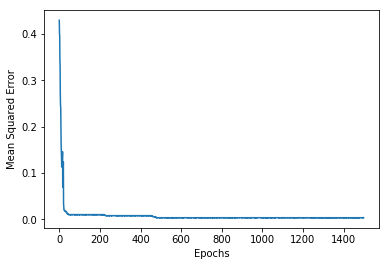

In [27]:
sn_mse = SigmoidNeuron()
sn_mse.fit(X_scaled_train, Y_train, epochs=1500, learning_rate=0.2, loss_fn="mse", display_loss=True)


0.003126685154490403


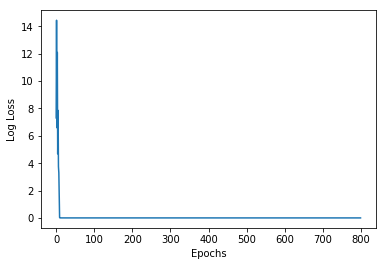

In [40]:
sn_ce = SigmoidNeuron()
sn_ce.fit(X_scaled_train, Y_train, epochs=800, learning_rate=0.02, loss_fn="ce", display_loss=True)

In [41]:
def print_accuracy(sn):
  Y_pred_train = sn.predict(X_scaled_train)
  Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
  accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
  print("Train Accuracy : ", accuracy_train)
  print("-"*50)

In [42]:
print_accuracy(sn_mse)
print_accuracy(sn_ce)

Train Accuracy :  0.995575221238938
--------------------------------------------------
Train Accuracy :  0.9977876106194691
--------------------------------------------------


##  Submission

In [ ]:
Y_pred_test = sn_ce.predict(X_scaled_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()

submission = {}
submission['ImageId'] = ID_test
submission['Class'] = Y_pred_binarised_test

submission = pd.DataFrame(submission)
submission = submission[['ImageId', 'Class']]
submission = submission.sort_values(['ImageId'])
submission.to_csv("submisision.csv", index=False)